## Обзор данных

### Импорт нужных библиотек и чтение файла с данными

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats as st
import numpy as np

In [3]:
data = pd.read_csv('/datasets/games.csv')
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


### Изучение общей информации в датафрейме

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


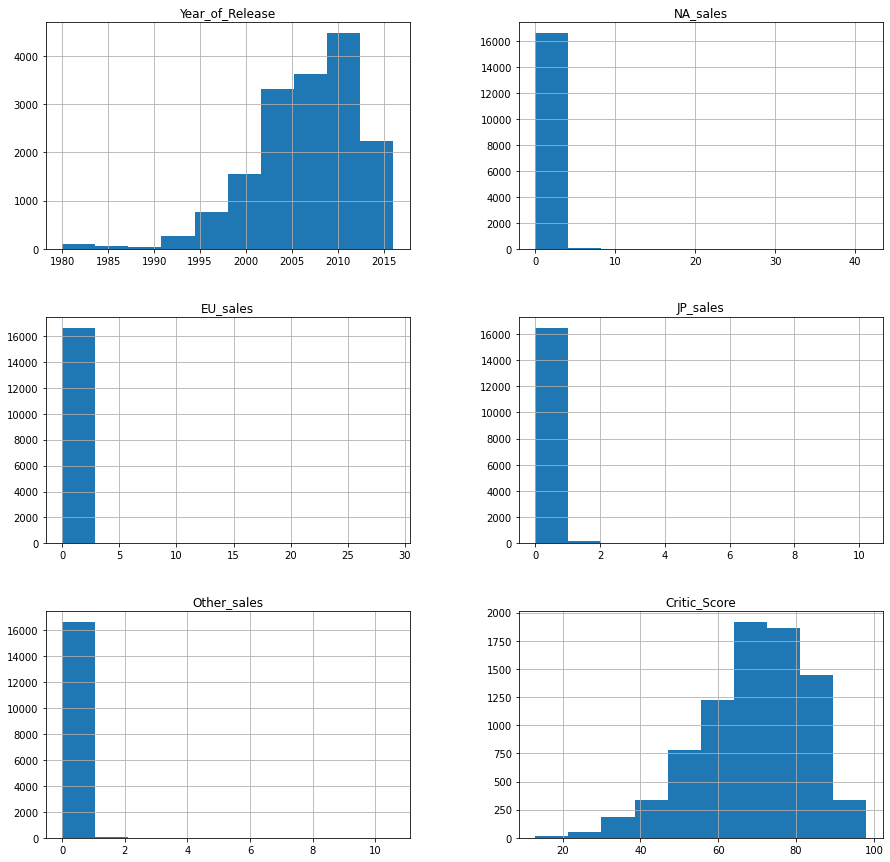

In [5]:
data.hist(figsize=(15, 15));

**Выводы:** В таблице содержатся данные о различных играх, продававшихся в разные года. Столбцы описывают характеристики каждой игры - название, жанр, платформа, на которой была выпущена игра, продажи в разных регионах, оценки критиков и пользовательей, а также возрастной рейтинг. В некоторых строках пропущены значения оценок и рейтинга. На гистограммах можно видеть распределение оценок и годов выпуска игр.

## Подготовка данных

### Проверка на явные дубликаты

In [6]:
data.duplicated().sum()

0

### Изменение названий столбцов

In [7]:
data = data.rename(str.lower, axis='columns')
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Приведем названия столбцов к общепринятому виду для удобства использования.

### Работа с пропусками

In [8]:
#напишем функцию для отображения пропущенных значений в виде горизонтального графика
def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns={0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind= 'barh', figsize=(19,6), legend = False, fontsize = 16)
            .set_title('Пропущенные значения' + "\n", fontsize = 22, color = 'red')
        );
    except:
        print('ошибка')

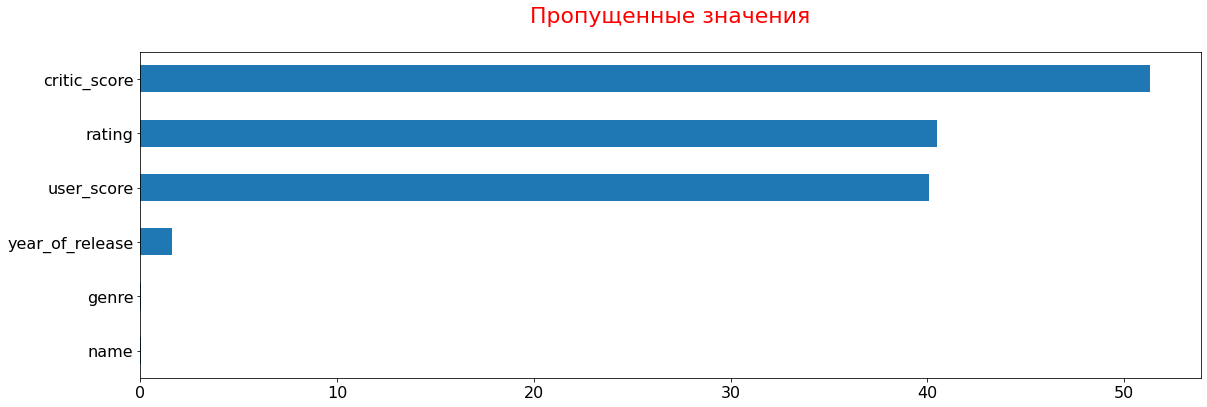

In [9]:
pass_value_barh(data) 

Пропущенные значения обнаружились в колонках с оценкой критиков и пользователей, в колонке с возрастным рейтингом и с годом выпуска. Крайне малое количество пропусков есть и в столбцах с жанром и названием игры.

In [10]:
#Создадим цикл для восстановления года выпуска игры, основываясь на упомянутом в ее названии году
na = data.query('year_of_release.isna()')
for i in na['name']:
    if '2002' in i:
        data.loc[data['name'] == i, 'year_of_release'] = 2001
    elif '2003' in i:
        data.loc[data['name'] == i, 'year_of_release'] = 2002
    elif '2004' in i:
        data.loc[data['name'] == i, 'year_of_release'] = 2003
    elif '2005' in i:
        data.loc[data['name'] == i, 'year_of_release'] = 2004
    elif '2006' in i:
        data.loc[data['name'] == i, 'year_of_release'] = 2005
    elif '2007' in i:
        data.loc[data['name'] == i, 'year_of_release'] = 2006
    elif '2008' in i:
        data.loc[data['name'] == i, 'year_of_release'] = 2007

In [11]:
#Оставшуюся часть пропусков в колонке с годом выпуска удалим,
#так как их небольшое количество не повлияет на общий ход исследования
data = data.dropna(subset = ['year_of_release'], axis = 'index')
data['year_of_release'].isna().sum()

0

In [12]:
#Удалим пропущенные значения в столбце с жанрами
data = data.dropna(subset = ['genre'], axis = 'index')
data['genre'].isna().sum()

0

In [13]:
#Удалим пропущенные значения в столбце с названиями
data = data.dropna(subset = ['name'], axis = 'index')
data['name'].isna().sum()

0

In [14]:
data.query('user_score == "tbd"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
718,Just Dance Kids,Wii,2010.0,Misc,1.52,0.54,0.0,0.18,NaN,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


In [15]:
#Для правильной обработки оценок пользователей выделим строки с данной пометкой в отдельный столбец
tbd = data.query('user_score == "tbd"')
data['score_tbd'] = data.loc[data['user_score'] == 'tbd', 'user_score']
#Для строк, где была поставлена пометка в новом столбце введем обозначение Y (yes), соотнясящееся с названием столбца
data.loc[data['score_tbd'] == 'tbd', 'score_tbd'] = 'Y'
#Пустые значения заполним обозначением N, так как они не ожидают оценок
data['score_tbd'] = data['score_tbd'].fillna('N')
# В изначальном столбце с оценками пользователей заменим отметку tbd на None, чтобы они не мешали рассчетам
data.loc[data['user_score'] == 'tbd', 'user_score'] = None
data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,score_tbd
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,N
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,N
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,N
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,N
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,N
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,N
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,N
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,N
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,N
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,N


In [16]:
data['rating'] = data['rating'].fillna('N/A')

Аббревиатура "tbd" означает, что оценка для игры еще не была выставлена пользователями. Для этого есть несколько возможных причин: игра, которая вышла совсем недавно еще не успела получить оценки игроков, либо достаточно старая или непопулярная игра, в которую играло слишком малое количество людей, чтобы была выставлена какая-то оценка. При этом у игры может быть выставлена оценка критиков.

Пропуски в колонках user_score, critic_score и rating не будем заполнять, так как это может привести к аномалиям, ведь мы не знаем какая оценка может быть выставленая той или иной игре. Удалить эти строки мы также не можем, поскольку выборка потеряет слишком много данных от этого.

### Преобразование типов данных

In [17]:
data['year_of_release'] = data['year_of_release'].astype(int)

Переведем столбец с годами выпуска игр в целочисленные значения, так как года обозначаются целыми числами.

In [18]:
data['user_score'] = data['user_score'].astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16458 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16458 non-null  object 
 1   platform         16458 non-null  object 
 2   year_of_release  16458 non-null  int64  
 3   genre            16458 non-null  object 
 4   na_sales         16458 non-null  float64
 5   eu_sales         16458 non-null  float64
 6   jp_sales         16458 non-null  float64
 7   other_sales      16458 non-null  float64
 8   critic_score     7993 non-null   float64
 9   user_score       7471 non-null   float64
 10  rating           16458 non-null  object 
 11  score_tbd        16458 non-null  object 
dtypes: float64(6), int64(1), object(5)
memory usage: 1.6+ MB


Столбец user_score переведем в вещественные числа, так как в нем содержатся оценки в виде вещественных чисел. До этого тип данных в столбце был object, вызванный наличием отметки "tbd".

### Суммарные продажи в регионах

In [19]:
#Создадим отдельный столбец с общим количеством продаж
data['total_sales'] = data[['eu_sales', 'na_sales', 'jp_sales', 'other_sales']].sum(axis=1)

In [20]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,score_tbd,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,N,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,N/A,N,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,N,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,N,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,N/A,N,31.38


Проверим датафрейм на аномалии.

In [21]:
(
    data[['year_of_release', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'total_sales']]
    .apply (['count', 'min', 'max']) 
    .style.format("{:,.2f}")
)

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,"16,458.00","16,458.00","16,458.00","16,458.00","16,458.00","7,993.00","7,471.00","16,458.00"
min,"1,980.00",0.00,0.00,0.00,0.00,13.00,0.00,0.00
max,"2,016.00",41.36,28.96,10.22,10.57,98.00,9.70,82.54


In [22]:
data = data.drop(labels=15957)

**Вывод:** В ходе подготовки данных были заполнены или удалены пропуски в колонках с годом выпуска, названием и жанром игр. Особое обозначение в столбце с оценками пользователей было обработано при помощи отдельного столбца и удаления обозначения в оригинальном столбце. Преобразовали типы данных в некоторых столбцах, а также создали новый столбец с общим количеством продаж.

## Исследовательский анализ данных

### Выпуск игр в разные годы

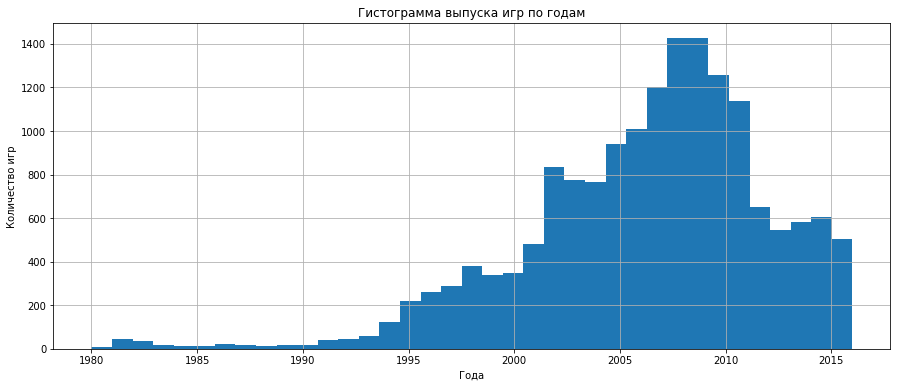

In [24]:
x = data['year_of_release']
fig, ax = plt.subplots(figsize=(15, 6))
ax.hist(x, bins=37)
ax.set_xlabel('Года')
ax.set_ylabel('Количество игр')
ax.set_title('Гистограмма выпуска игр по годам')
plt.grid()


По графику видно, что сильный и довольно резкий рост производства игр начался в 1994 и продолжился до 2009, после которого темпы выпуска уменьшились. Можно сказать, что данные до 1994 не так важны для исследования, поскольку доля выпуска игр в этом промежутке очень мала, по сравнению с другими годами.

### Распределение продаж по платформам

<AxesSubplot:xlabel='platform'>

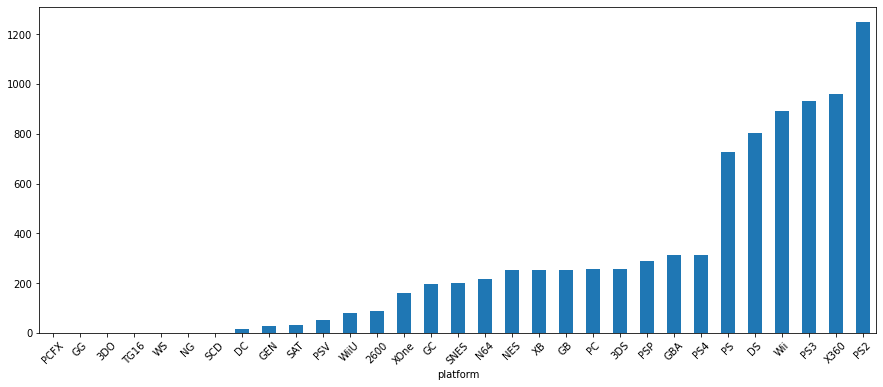

In [25]:
platform_stat = data.pivot_table(index='platform', values='total_sales', aggfunc='sum')
platform_stat.sort_values('total_sales').plot(kind='bar', figsize=(15,6), legend=False, rot=45);

Больше всего проданных игр наблюдается у таких платформ, как: PS2, PS3, X360, Wii, DS и PS.

<AxesSubplot:xlabel='platform', ylabel='year_of_release'>

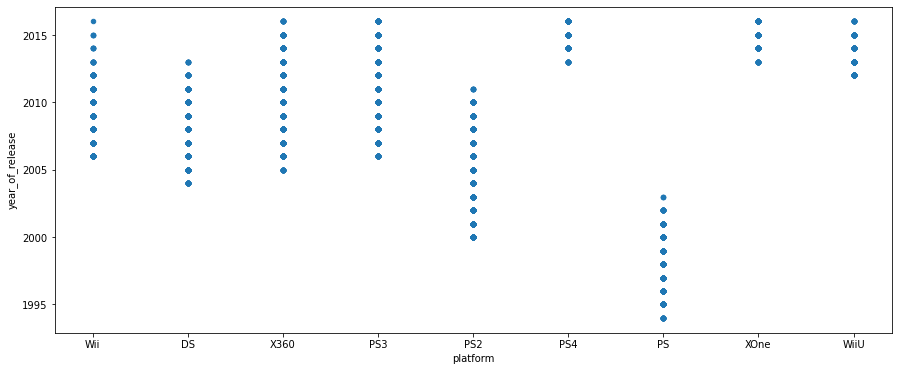

In [26]:
filt_plat = data.query('platform == "PS" or platform == "PS2" or \
platform == "PS3" or platform == "PS4" or platform == "X360" or \
platform == "XOne" or platform == "Wii" or platform == "WiiU" or platform == "DS"')
filt_plat.plot(x='platform', y='year_of_release', kind='scatter', figsize=(15, 6));


Для наглядности в график были добавлены обновленные платформы, которые пока еще не набрали такой популярности, как их старые версии. Это позволяет лучше отследить момент перехода платформы на новое поколение и то, как долго существует после этого предыдущая версия. 
Можно видеть, что платформы, как правило, обновляются через 6-8 лет. После выхода новых, старые платформы продолжают поддерживаться и пользоваться спросом на протяжении 4-6 лет.

### Данные за актуальный период

In [27]:
data_rel = data.query('year_of_release >= 2013')

Зная то, как часто обновляются платформы и сколько они поддерживаются, можно определить актульный период, как отрезок времени с 2013 года. Поскольку в этом году вышли новые платформы, которые будут актуальны еще достаточно долго, а также старые платформы будут пользоваться спросом еще несколько лет, в том числе в 2017-2018 годах.

<AxesSubplot:xlabel='platform'>

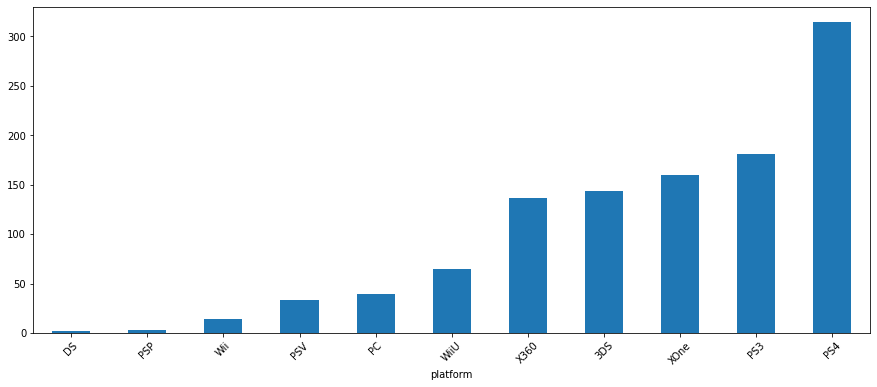

In [28]:
new_platform_stat = data_rel.pivot_table(index='platform', values='total_sales', aggfunc='sum')
new_platform_stat.sort_values(by='total_sales').plot(kind='bar', figsize=(15,6), legend=False, rot=45);

На графике распределения продаж по платформам за актуальный период заметно лидерство "PS4". "XOne", "PS3", "X360", "3DS" находятся примерно на одном уровне. Тем не менее, XOne начинает смещать свою предыдущую версию X360. Точно так же ситуация складывается для PS3, Wii и PSP, продажи для которых падают.

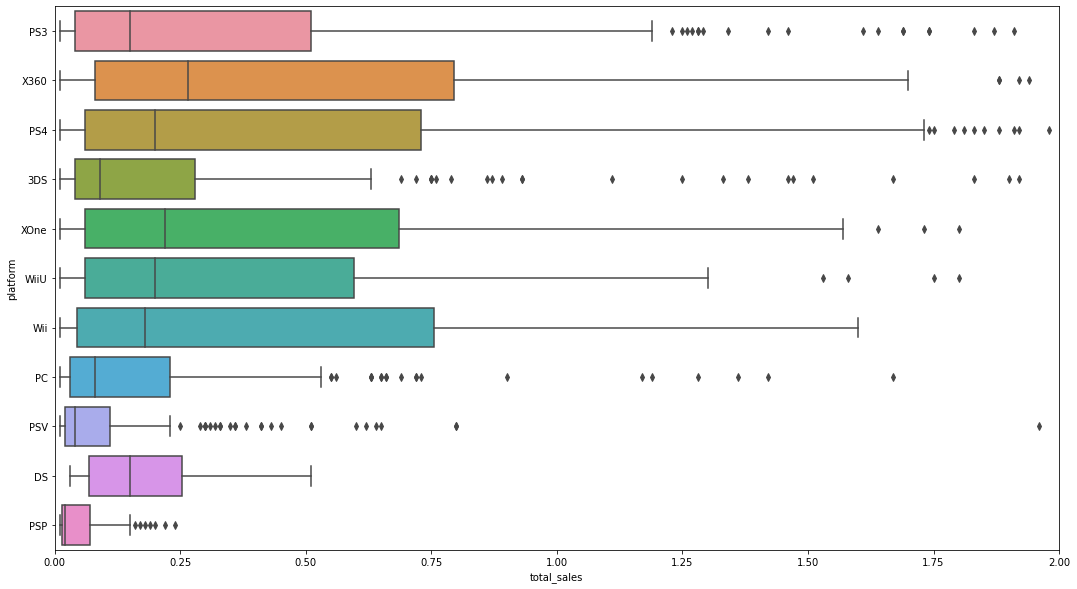

In [29]:
fig, ax = plt.subplots(figsize=(18, 10))
sns.boxplot(data=data_rel, x="total_sales", y="platform", ax=ax)
plt.xlim(0, 2)
plt.show()

На графике выделяются самые популярные платформы. Почти у каждой из них медиана проданных для них игр находится около отметки 0.25. У таких платформ 3 и 4 квартили находятся на больших отметках, что говорит о большом спросе на эти платформы. 

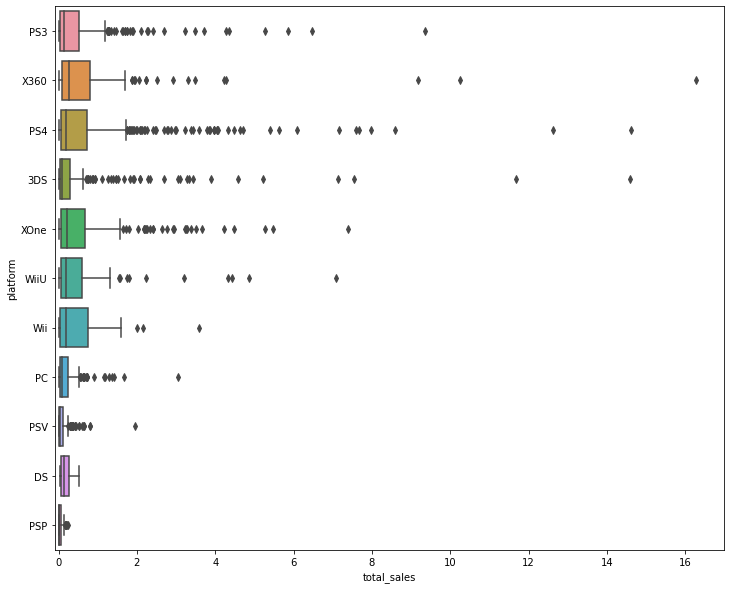

In [30]:
fig, ax = plt.subplots(figsize=(12, 10))
sns.boxplot(data=data_rel, x="total_sales", y="platform", ax=ax)
plt.xlim(-0.1, 17)
plt.show()

На второй диаграмме мы может видеть все выбросы у каждой из платформ.

In [31]:
ps_4_stat = data_rel.query('platform == "PS4"')

['Корреляция оценок пользователей и продаж для PS3: 0.0023944027357566925 ']
['Корреляция оценок критиков и продаж для PS3: 0.3342853393371919 ']


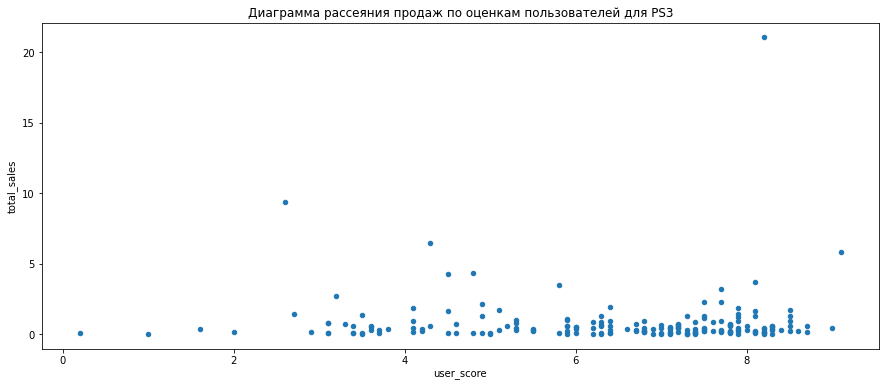

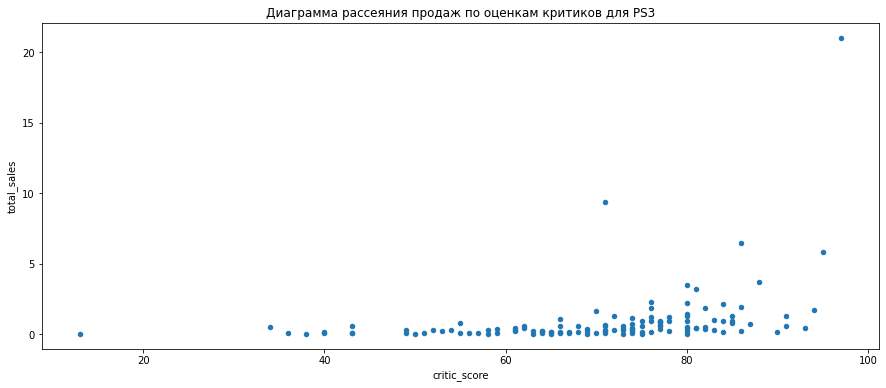

['Корреляция оценок пользователей и продаж для X360: -0.011742185147181342 ']
['Корреляция оценок критиков и продаж для X360: 0.3503445460228664 ']


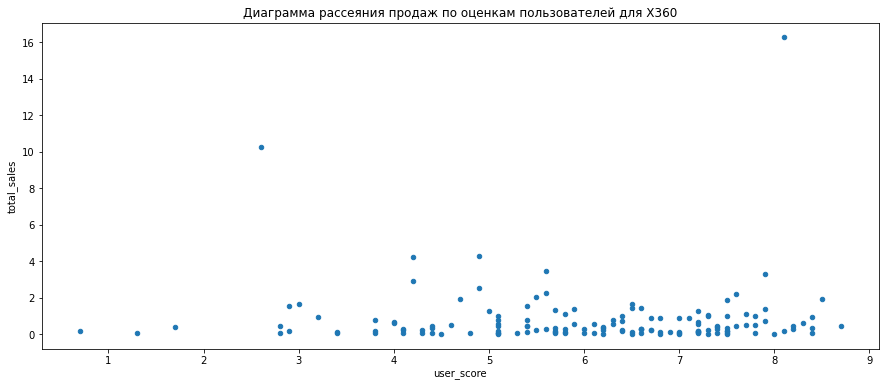

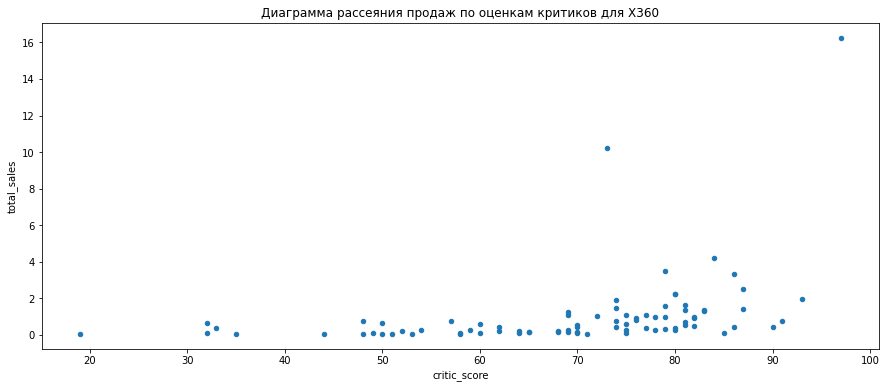

['Корреляция оценок пользователей и продаж для PS4: -0.031957110204556376 ']
['Корреляция оценок критиков и продаж для PS4: 0.406567902061781 ']


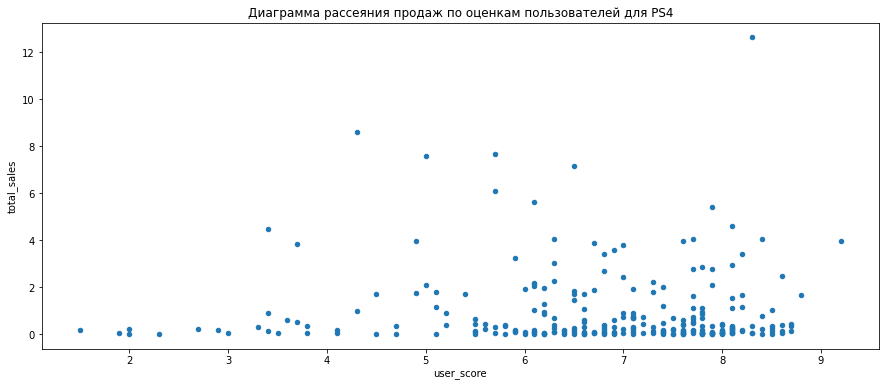

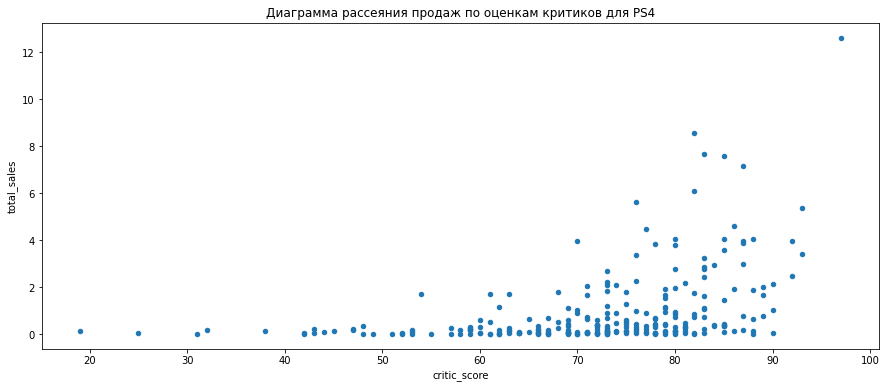

['Корреляция оценок пользователей и продаж для 3DS: 0.24150411773563016 ']
['Корреляция оценок критиков и продаж для 3DS: 0.35705661422881035 ']


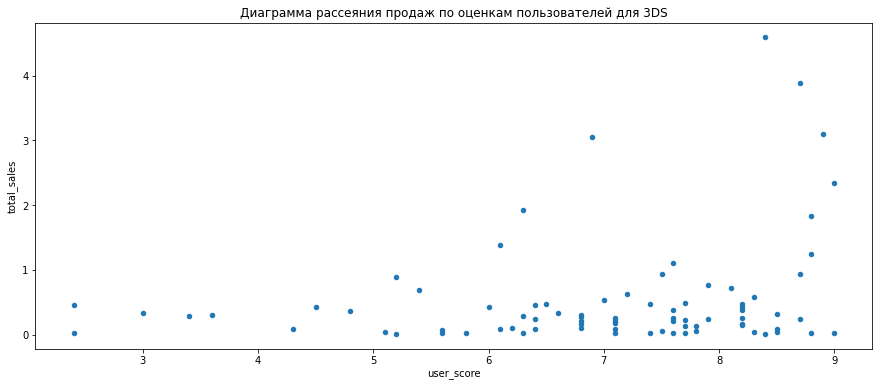

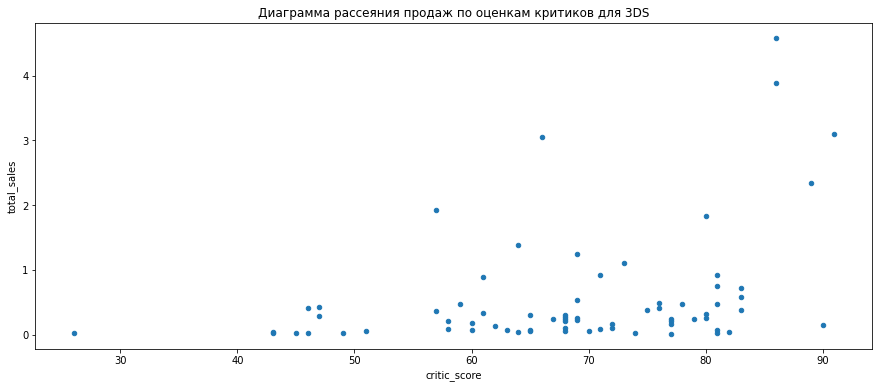

['Корреляция оценок пользователей и продаж для XOne: -0.06892505328279412 ']
['Корреляция оценок критиков и продаж для XOne: 0.41699832800840175 ']


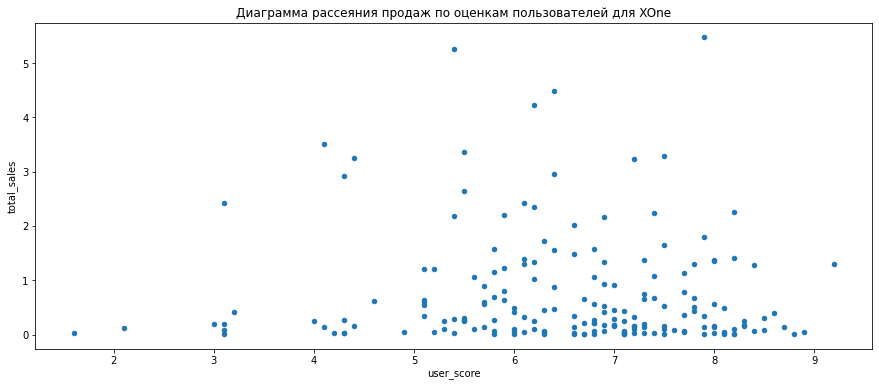

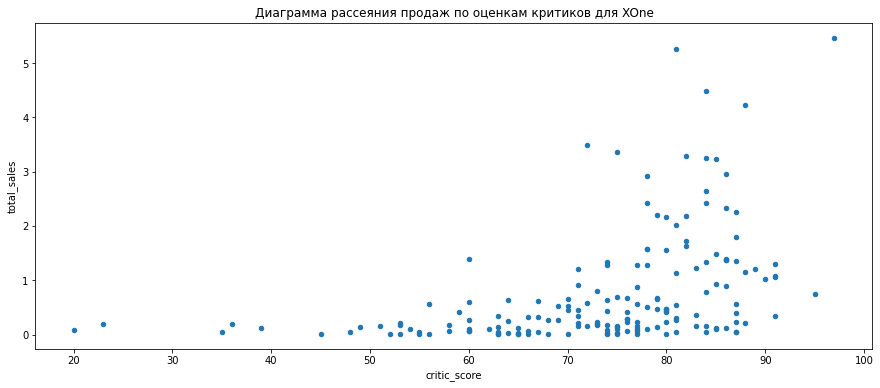

['Корреляция оценок пользователей и продаж для WiiU: 0.4193304819266187 ']
['Корреляция оценок критиков и продаж для WiiU: 0.3764149065423912 ']


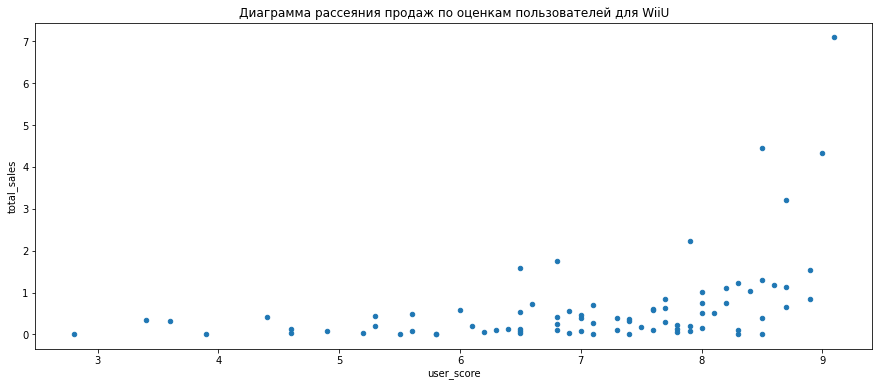

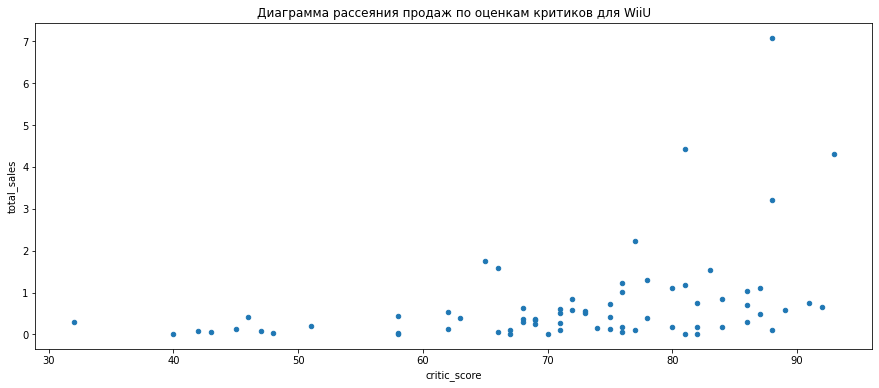

In [32]:
for i in data_rel['platform'].unique():
    if i == 'PS4' or i == 'PS3' or i == 'XOne' or i == 'X360' or i == '3DS' or i == 'WiiU':
        data_rel[data_rel['platform'] == i].plot(
            kind='scatter', 
            x='user_score', y='total_sales',
            figsize=(15,6),
            title=(f'Диаграмма рассеяния продаж по оценкам пользователей для {i}'))
        user_cor = data_rel[data_rel['platform'] == i]['total_sales'].corr(data_rel[data_rel['platform'] == i]['user_score'])
        print(f'Корреляция оценок пользователей и продаж для {i}: {user_cor} \n'.splitlines())
        data_rel[data_rel['platform'] == i].plot(
            kind='scatter',
            x='critic_score', y='total_sales',
            figsize=(15,6),
            title=(f'Диаграмма рассеяния продаж по оценкам критиков для {i}'))
        critic_cor=data_rel[data_rel['platform'] == i]['total_sales'].corr(data_rel[data_rel['platform'] == i]['critic_score'])
        print(f'Корреляция оценок критиков и продаж для {i}: {critic_cor} \n'.splitlines())
        plt.show()

Как правило, оценки пользователей не влияют на продажи, но у некоторых консолей зависимость больше, чем у других (WiiU, 3DS). Оценки критиков оказывают небольшое влияние на продажи.

### Распределение игр по жанрам

<AxesSubplot:>

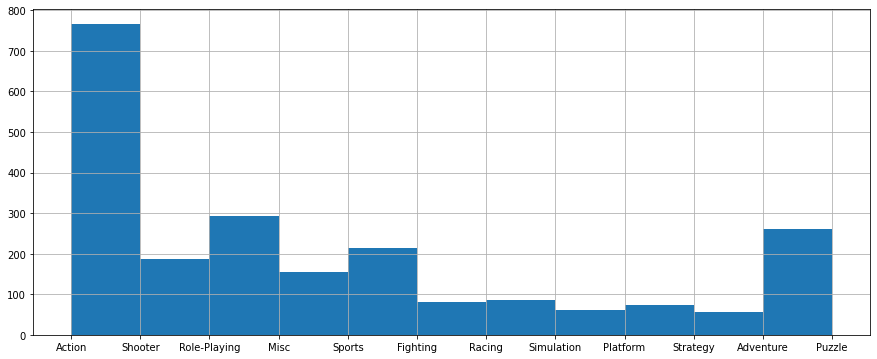

In [33]:
data_rel['genre'].hist(figsize=(15, 6), bins=11)

Самым популярным жанром является "Action", жанры "Role-Playing", "Sports", "Shooter" и "Adventure" находятся примерно на одном уровне.

<AxesSubplot:xlabel='genre'>

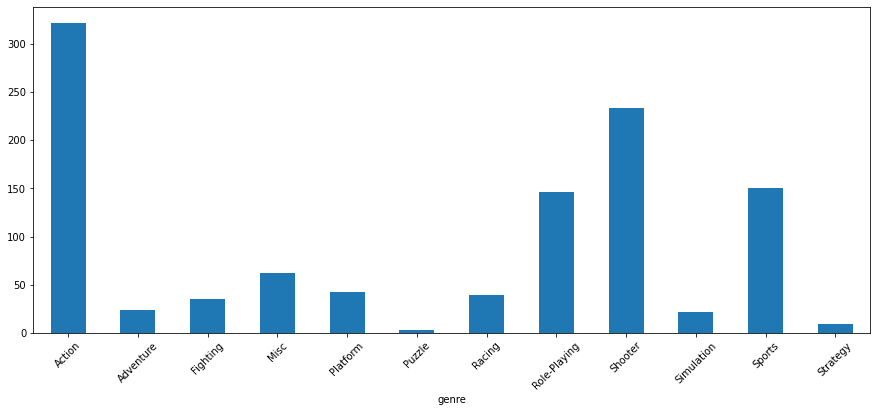

In [34]:
genre_sales = data_rel.pivot_table(index='genre', values='total_sales', aggfunc='sum')
genre_sales.plot(kind='bar', figsize=(15,6), legend=False, rot=45)

Больше всего прибыли приносит жанр Action, далее идёт Shooter, продажи Sports и Role-Playing находятся на одной отметке. Игры жанра Puzzle продаются меньше всего.

<AxesSubplot:ylabel='genre'>

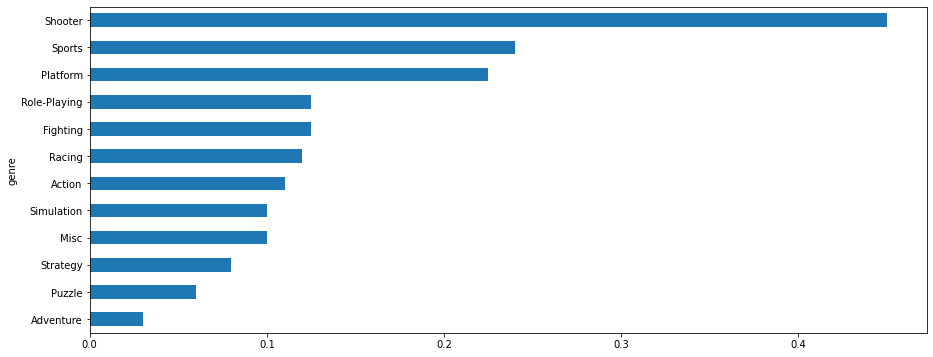

In [35]:
genre_table = data_rel.pivot_table(index='genre', values='total_sales', aggfunc='median')
genre_table.sort_values(by='total_sales').plot(kind='barh', figsize=(15,6), legend=False)

График показывает, что по медианным продажам на первом месте находится данр Shooter, также выделяются игры жанра Sports и Platform.

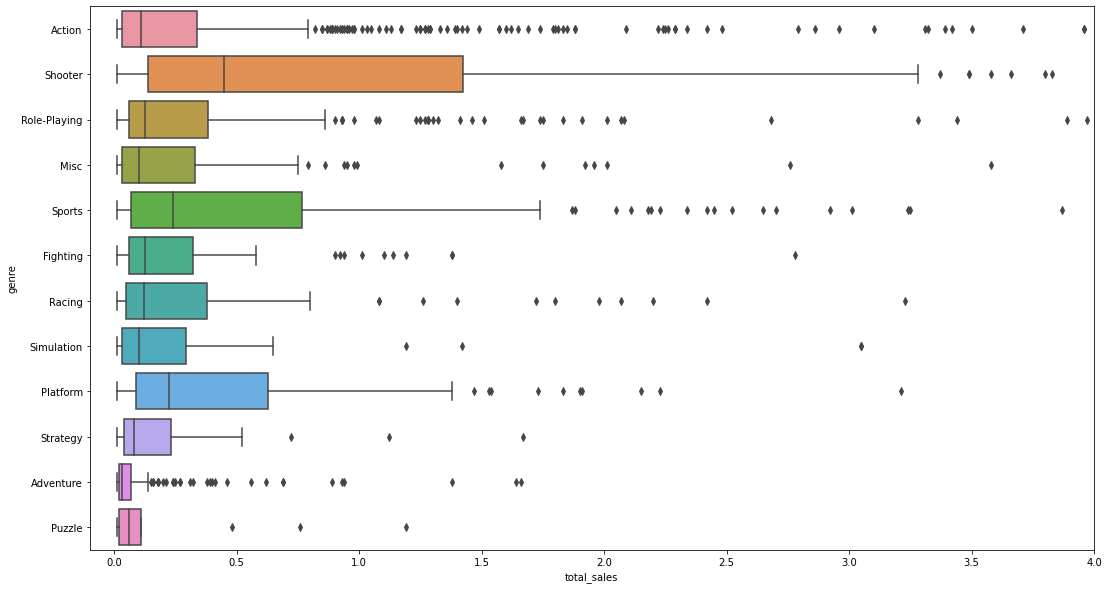

In [36]:
fig, ax = plt.subplots(figsize=(18, 10))
sns.boxplot(data=data_rel, x="total_sales", y="genre", ax=ax)
plt.xlim(-0.1, 4)
plt.show()

Это подтверждается и на диаграмме размаха.

**Вывод:** Мы выяснили, что период до 1994 года незначителен, так как игр выпускалось крайне мало. К самым популярным платформам относятся платформы серии PS, а также X360, Wii и DS. Платформы обновляются раз в 6-8 лет, отталкиваясь от этого мы обозначили актуальный период, начиная с 2013 года. В этом периоде выделяется PS4. Оценки критиков незначительно влияют на продажи игр как для PS4, так и для других платформ. Оценки пользователей, при этом, не влияют на продажу. Среди жанров выделяется Action, как самый популярный, и Puzzle, как самый непопулярный. По медианным продажам выделяются жанры Shooter, sports и platform.

## Портрет пользователей разных регинов

### Самые популярные платформы

platform
PS4     108.74
XOne     93.12
X360     81.66
PS3      63.50
3DS      38.20
Name: na_sales, dtype: float64

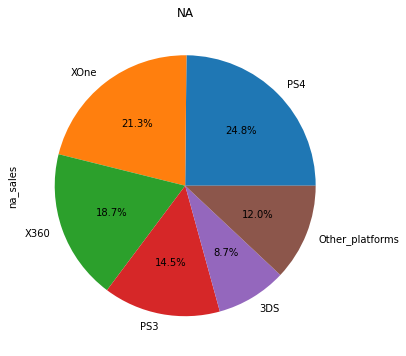

In [37]:
data_NA = data_rel.groupby('platform')['na_sales'].sum().sort_values(ascending=False)
display(data_NA.head())
data_NA['Other_platforms'] = data_NA[5::].sum()
data_NA = data_NA.drop(labels=['PC', 'PSV', 'WiiU', 'DS', 'PSP', 'Wii'])
data_NA.plot(kind='pie', autopct='%.1f%%', figsize=(15,6), title='NA');

Пользователи региона NA больше всего пользуются X360 и PS2. Доля продаж в этом регионе больше, чем в других, так как этот он является самым массовым.

platform
3DS     67.81
PS3     23.35
PSV     18.59
PS4     15.96
WiiU    10.88
Name: jp_sales, dtype: float64

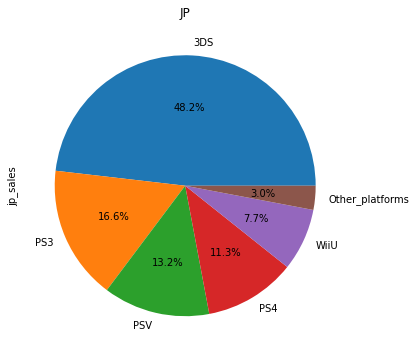

In [38]:
data_JP = data_rel.groupby('platform')['jp_sales'].sum().sort_values(ascending=False)
display(data_JP.head())
data_JP['Other_platforms'] = data_JP[5::].sum()
data_JP = data_JP.drop(labels=['PC', 'X360', 'XOne', 'Wii', 'DS', 'PSP'])
data_JP.plot(kind='pie', autopct='%.1f%%', figsize=(15,6), title='JP');

В топ-5 платформ, которыми пользуются игроки в регионе JP, входят только японские платформы. Доля продаж в регионе самая маленькая, в сравнении с другими регионами.

platform
PS4     141.09
PS3      67.81
XOne     51.59
X360     42.52
3DS      30.96
Name: eu_sales, dtype: float64

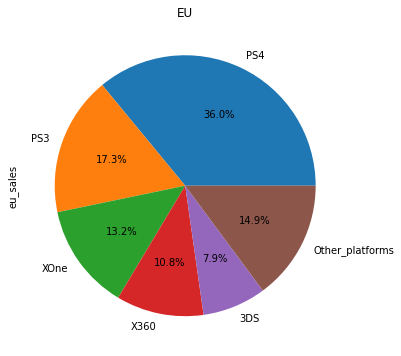

In [39]:
data_EU = data_rel.groupby('platform')['eu_sales'].sum().sort_values(ascending=False)
display(data_EU.head())
data_EU['Other_platforms'] = data_EU[5::].sum()
data_EU = data_EU.drop(labels=['PC', 'WiiU', 'PSV', 'Wii', 'DS', 'PSP'])
data_EU.plot(kind='pie', autopct='%.1f%%', figsize=(15,6), title='EU');

Регион EU является вторым по уровню продаж, здесь первые места занимают японские платформы, в отличие от региона NA.

### Самые популярные жанры

genre
Action          126.05
Shooter         109.74
Sports           65.27
Role-Playing     46.40
Misc             27.49
Name: na_sales, dtype: float64

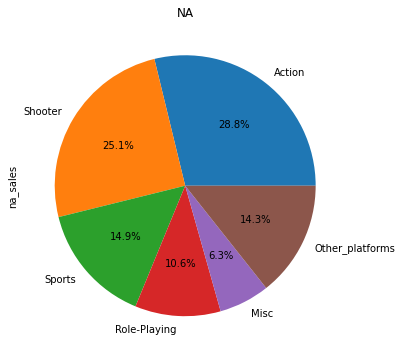

In [40]:
genre_NA = data_rel.groupby('genre')['na_sales'].sum().sort_values(ascending=False)
display(genre_NA.head())
genre_NA['Other_platforms'] = genre_NA[5::].sum()
genre_NA = genre_NA.drop(labels=['Platform', 'Fighting', 'Adventure', 'Simulation', 'Strategy', 'Puzzle', 'Racing'])
genre_NA.plot(kind='pie', autopct='%.1f%%', figsize=(15,6), title='NA');

Action в регионе NA является самым популярным жанром, далее идут Sports, Shooter, Platform и Misc.

genre
Role-Playing    51.04
Action          40.49
Misc             9.20
Fighting         7.65
Shooter          6.61
Name: jp_sales, dtype: float64

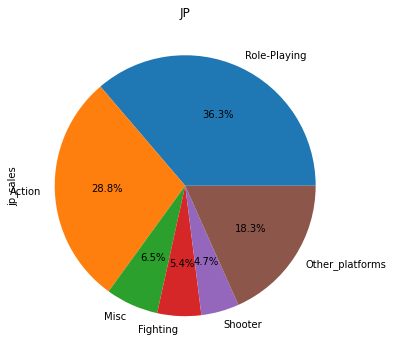

In [41]:
genre_JP = data_rel.groupby('genre')['jp_sales'].sum().sort_values(ascending=False)
display(genre_JP.head())
genre_JP['Other_platforms'] = genre_JP[5::].sum()
genre_JP = genre_JP.drop(labels=['Platform', 'Sports', 'Adventure', 'Simulation', 'Strategy', 'Puzzle', 'Racing'])
genre_JP.plot(kind='pie', autopct='%.1f%%', figsize=(15,6), title='JP');

В регионе JP на первом месте находится жанр Role-Playing, в отличие от NA. Жанр Action находится на втором месте. Shooter не пользуется такой популярность, как в других регионах.

genre
Action          118.13
Shooter          87.86
Sports           60.52
Role-Playing     36.97
Racing           20.19
Name: eu_sales, dtype: float64

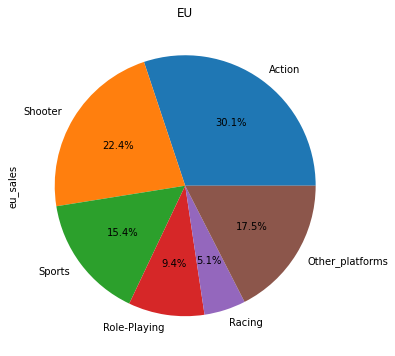

In [42]:
genre_EU = data_rel.groupby('genre')['eu_sales'].sum().sort_values(ascending=False)
display(genre_EU.head())
genre_EU['Other_platforms'] = genre_EU[5::].sum()
genre_EU = genre_EU.drop(labels=['Platform', 'Misc', 'Adventure', 'Simulation', 'Strategy', 'Puzzle', 'Fighting'])
genre_EU.plot(kind='pie', autopct='%.1f%%', figsize=(15,6), title='EU');

Популярные жанры в регионе EU по большей части повторяют те, что перечислены для региона NA. Однако, жанр Racing занял 4 место вместо Platform.

### Влияние возрастного рейтинга

In [43]:
#Для исследования зависимости продаж от возрастного рейтинга нужно знать какие рейтинги присваивались играм
data_rel['rating'].unique()

array(['M', 'N/A', 'E', 'T', 'E10+'], dtype=object)

In [44]:
#Создадим копию столбца с рейтингом для работы с ним
data_rel = data_rel.reset_index(drop=True)
data_rel['rating_int'] = data_rel['rating'].copy()

In [45]:
#Чтобы определить корреляцию продаж и рейтинга, необходимо перевести рейтинг в числовое значение
#Напишем цикл для преобразования в числовое значение в зависимости от рейтинга
for i in data_rel['rating_int']:
    if i == 'E':
        data_rel.loc[data_rel['rating_int'] == i, 'rating_int'] = 1
    elif i == 'T':
        data_rel.loc[data_rel['rating_int'] == i, 'rating_int'] = 2
    elif i == 'E10+':
        data_rel.loc[data_rel['rating_int'] == i, 'rating_int'] = 3
    elif i == 'M':
        data_rel.loc[data_rel['rating_int'] == i, 'rating_int'] = 4
    elif i == 'N/A':
        data_rel.loc[data_rel['rating_int'] == i, 'rating_int'] = 5



In [46]:
data_rel['rating_int'] = data_rel['rating_int'].astype(float)

In [47]:
data_rel['rating_int'].corr(data_rel['na_sales'])

-0.07437983062566299

In [48]:
data_rel['rating_int'].corr(data_rel['jp_sales'])

0.059043830339759

In [49]:
data_rel['rating_int'].corr(data_rel['eu_sales'])

-0.08739704713922233

In [50]:
# Комментарий ревьюера
data1 = data_rel.copy()
data1['rating_int'] = data1['rating_int'].replace(0, np.NaN)
data1['rating_int'].corr(data1['na_sales']), data_rel['rating_int'].corr(data_rel['na_sales'])

(-0.07437983062566299, -0.07437983062566299)

Зависимость продаж от возрастного рейтинга околонулевая.

<AxesSubplot:xlabel='rating'>

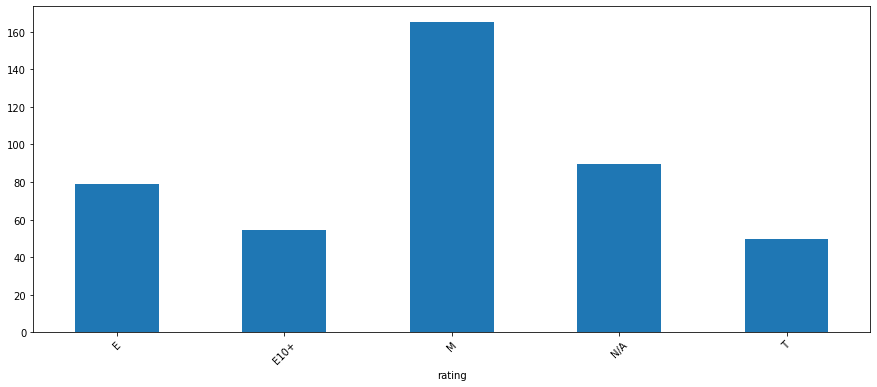

In [51]:
na = data_rel.pivot_table(index='rating', values='na_sales', aggfunc='sum')
na.plot(kind='bar', figsize=(15,6), legend=False, rot=45);

<AxesSubplot:xlabel='rating'>

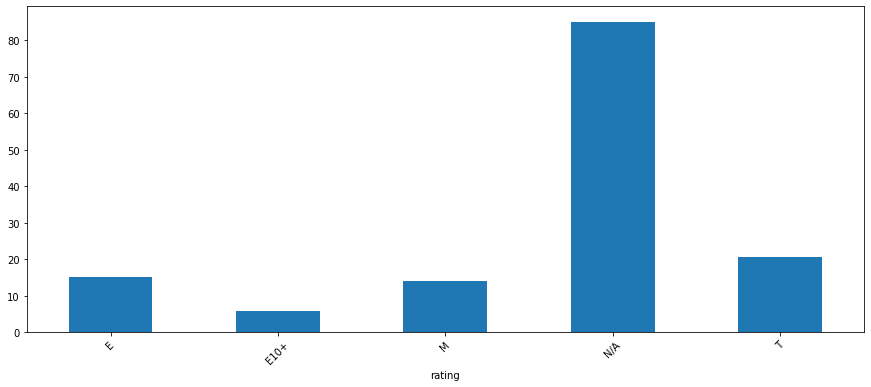

In [52]:
jp = data_rel.pivot_table(index='rating', values='jp_sales', aggfunc='sum')
jp.plot(kind='bar', figsize=(15,6), legend=False, rot=45)

<AxesSubplot:xlabel='rating'>

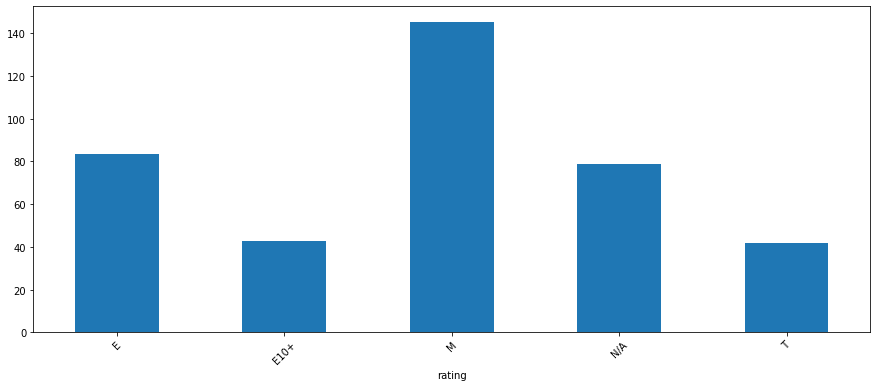

In [53]:
eu = data_rel.pivot_table(index='rating', values='eu_sales', aggfunc='sum')
eu.plot(kind='bar', figsize=(15,6), legend=False, rot=45);

Графики для регионов NA и EU очень похожи между собой, в то время, как в регионе JP преобладют игры без рейтинга. Можно предположить, что влияние рейтинга на продажи в регионе JP очень маленькое. Однако он может в какой-то мере влиять на продажи в регионах NA и EU, поскольку большая часть игр там имеет возрастной рейтинг.

**Вывод:** В разных регионах первыми по популярности являются разные платформы: в NA - "X360", в JP - "DS", в EU - "PS2". В регоинах NA и EU топ жанров знимают Action игры, в JP на первом месте находится жанр Role-Playing. Влияние возрастного рейтинга на продажи незначительно во всех регионах.

## Проверка гипотез

Проверим нулевая гипотезу, которая гласит - средние пользовательские рейтинги XOne и PS4 равны и альтернативную гипотезу - средние пользовательские рейтинги XOne и PS4 не равны.

In [55]:
#Отберем строки без пропусков для проверки гипотезы
xbone_score = data_rel[(data_rel['platform'] == 'XOne') & (data_rel['user_score'].isna() == False)]['user_score']
pc_score = data_rel[(data_rel['platform'] == 'PC') & (data_rel['user_score'].isna() == False)]['user_score']
alpha = 0.01
results = st.ttest_ind(xbone_score, pc_score, equal_var = False)
print(f'p-значение: {results.pvalue}')
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


In [56]:
#Выведем среднее значение оценок платформы XOne
data_rel[data_rel['platform'] == 'XOne']['user_score'].mean()

6.521428571428572

In [57]:
#Выведем среднее значение оценок платформы PC
data_rel[data_rel['platform'] == 'PC']['user_score'].mean()

6.269677419354839

Проверим нулевая гипотезу, которая гласит - средние пользовательские рейтинги жанров Action и Sports равны и альтернативную гипотезу - средние пользовательские рейтинги жанров Action и Sports не равны.

In [58]:
#Отберем строки без пропусков для проверки гипотезы
action_score = data_rel[(data_rel['genre'] == 'Action') & (data_rel['user_score'].isna() == False)]['user_score']
sports_score = data_rel[(data_rel['genre'] == 'Sports') & (data_rel['user_score'].isna() == False)]['user_score']
alpha = 0.01
results = st.ttest_ind(action_score, sports_score, equal_var = False)
print(f'p-значение: {results.pvalue}')
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.4460039700704315e-20
Отвергаем нулевую гипотезу


In [59]:
#Выведем среднее значение оценок жанра Action
data_rel[data_rel['genre'] == 'Action']['user_score'].mean()

6.837532133676093

In [60]:
#Выведем среднее значение оценок жанра Sports
data_rel[data_rel['genre'] == 'Sports']['user_score'].mean()

5.238124999999999

Критерием в данном случае стало распределение стьюдента, так как она лучше всего подходит для проверки равенства двух средних выборки.

## Общий вывод

В ходе исследования мы изенили названия столбцов на нижний регистр для удобного использования, обработали пропуски в столбцах и специальное обозначение "tbd" в колонке с оценками пользователей, преобразовали тип данных в некоторых столбцах и создали новый столбец с общим количеством продаж для каждой строки. 

Было обнаружено, что период до 1994 года является менее значительным, так как производилось очень малое количество игр по сравнению с перидом после 1994. К самым популярным платформам относятся платформы серии PS, X360, XOne, DS и некоторые другие. Новые версии консолей выходят через 6-8 лет, а старые версии поддерживаются еще около 4-6 лет после выпуска обновленной платформы. Актульным периодом мы обозначили промежуток с 2013 года, так как в этом году появились новые актуальные платформы, на которые будут выходить игры, а также старые платформы еще не успели потерять популярность и будут поддерживаться еще 1-2 года, что так же стоит иметь в виду. Среди популярных жанров выделяется Action, Sports, shooter и некоторые другие. Первое место по медианным продажам среди жанров занимают жанры Shooter, Sports и Platform.

В топе популярности разных регионов первые места занимают следующие платформы: в NA - "PS4", в JP - "3DS", в EU - "PS4". Популярные жанры в основном схожи, однако в JP регионе первое место занимает игры Role-Playing жанра. В регионе JP игры выпускаются, как правило, без возрастного рейтинг ESRB. В регионах NA и EU преобладают игры с рейтингом M.

При проверке гипотезы "средние пользовательские рейтинги XOne и PS4 равны" нулевая гипотеза не была отвергнута, а при проверке гипотезы "средние пользовательские рейтинги жанров Action и Sports равны" нулевая гипотеза была отвергнута.